In [1]:
import numpy as np
import laspy as lp
from tool import DataProcessing as DP
from helper_ply import write_ply, read_ply
from tqdm import tqdm


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
from labels import id2label

In [ ]:
id2label
for i in range(len(id2label)-1):
    print(id2label[i].name, ': ', id2label[i].trainId)

### Examples

In [12]:
path = 'data_3d_semantics/train/2013_05_28_drive_0000_sync/static/0000000002_0000000385.ply'

data = read_ply(path)
# np.savetxt('./data.txt', data, fmt='%d')
print(data.dtype)
print(np.asarray(data))

[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('semantic', '<i4'), ('instance', '<i4'), ('visible', 'u1'), ('confidence', '<f4')]
[(1000.8657, 3820.2976, 116.2225, 18, 29, 18, 21, 21000, 1, 0.9071393 )
 (1000.8753, 3820.3816, 116.193 , 19, 21, 19, 21, 21000, 1, 0.88185966)
 (1000.9065, 3820.6013, 116.188 , 12, 14, 11, 21, 21000, 1, 0.8589654 )
 ...
 (1001.1812, 3820.5242, 117.0209, 13, 17, 14, 21, 21000, 0, 1.        )
 (1001.1264, 3820.5708, 117.1629, 12, 14, 12, 21, 21000, 0, 1.        )
 (1001.1545, 3820.547 , 117.3406, 19, 17, 17, 21, 21000, 0, 1.        )]


In [17]:
path = 'data_3d_semantics/train/2013_05_28_drive_0000_sync/static/0000000002_0000000385.ply'
path = '/media/mspl/New Volume/ThinkTron/Kitti/data_3d_semantics/data_3d_semantics/train/converted_train3/0000000002_0000000357.ply'

xyz, rgb, labels = DP.read_ply_data(path, with_rgb=True, with_label=True)

In [16]:
for i in range(len(labels)):
    labels[i] = id2label[labels[i]].trainId

KeyError: 255

In [18]:
labels

array([9, 9, 9, ..., 8, 8, 8], dtype=uint8)

In [19]:
# labels.tofile('labels.txt')
np.savetxt('./data.txt', labels, delimiter=',', fmt='%d')

In [10]:
min(labels.tolist())

6

In [26]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join, split

In [20]:
train_files = list(pd.read_csv('data_3d_semantics/train/2013_05_28_drive_train.txt', delimiter = "\t", header=None)[0])
val_files = list(pd.read_csv('data_3d_semantics/train/2013_05_28_drive_val.txt', delimiter = "\t", header=None)[0])

In [21]:
testpath1 = 'data_3d_semantics/test/2013_05_28_drive_0008_sync/static/'
testpath2 = 'data_3d_semantics/test/2013_05_28_drive_0018_sync/static/'
test_files = [join(testpath1, f) for f in listdir(testpath1) if isfile(join(testpath1, f))] + [join(testpath2, f) for f in listdir(testpath2) if isfile(join(testpath2, f))]

print(len(test_files))

42


In [ ]:
# train files
output_path = 'data_3d_semantics/train/converted_train3/'
# print(output_paths)
for i in tqdm(range(len(train_files))):
    _, filename = split(train_files[i])
    # point_cloud=lp.read(train_files[i])
    xyz, rgb, labels = DP.read_ply_data(train_files[i], with_rgb=True, with_label=True)
    for i in range(len(labels)):
        labels[i] = id2label[labels[i]].trainId
        if labels[i]==-1 or labels[i]==255:
            labels[i] = 15
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic']
    write_ply(join(output_path, filename), [xyz, rgb, labels], field_names)
    # write_ply(output_paths[i], points, ['x', 'y', 'z'])

In [ ]:
# val files
output_path = 'data_3d_semantics/train/converted_val3/'
# print(output_paths)
for i in tqdm(range(len(val_files))):
    _, filename = split(val_files[i])
    xyz, rgb, labels = DP.read_ply_data(val_files[i], with_rgb=True, with_label=True)
    for i in range(len(labels)):
        labels[i] = id2label[labels[i]].trainId
        if labels[i]==-1 or labels[i]==255:
            labels[i] = 15
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic']
    write_ply(join(output_path, filename), [xyz, rgb, labels], field_names)

In [ ]:
# test files
output_path = 'data_3d_semantics/test/converted_test3/'
# print(output_paths)
for i in tqdm(range(len(test_files))):
    _, filename = split(test_files[i])
    xyz, rgb = DP.read_ply_data(test_files[i], with_rgb=True, with_label=False)
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue']
    write_ply(join(output_path, filename), [xyz, rgb], field_names)

In [10]:
xyz

array([[1000.8657, 3820.2976,  116.2225],
       [1000.8753, 3820.3816,  116.193 ],
       [1000.9065, 3820.6013,  116.188 ],
       ...,
       [1001.1812, 3820.5242,  117.0209],
       [1001.1264, 3820.5708,  117.1629],
       [1001.1545, 3820.547 ,  117.3406]], dtype=float32)

In [4]:
length = xyz.shape[0]
sum_x = np.sum(xyz[:, 0])
sum_y = np.sum(xyz[:, 1])
sum_z = np.sum(xyz[:, 2])
x = sum_x/length
y = sum_y/length
z = sum_z/length
print(x)
print(y)
print(z)

923.1289062817252
3741.386696354439
115.50409675015104


In [26]:
path2= './output/output_1.ply'
xyz2, rgb2 = DP.read_ply_data(path2, with_rgb=True, with_label=False)

In [27]:
length = xyz2.shape[0]
sum_x2 = np.sum(xyz2[:, 0])
sum_y2 = np.sum(xyz2[:, 1])
sum_z2 = np.sum(xyz2[:, 2])
x2 = sum_x2/length
y2 = sum_y2/length
z2 = sum_z2/length
print(x2)
print(y2)
print(z2)

272023.23462732113
2768801.6810691734
85.93140776051813


In [28]:
path3= './output/output_2.ply'
xyz3, rgb3 = DP.read_ply_data(path3, with_rgb=True, with_label=False)
length3 = xyz3.shape[0]
sum_x3 = np.sum(xyz3[:, 0])
sum_y3 = np.sum(xyz3[:, 1])
sum_z3 = np.sum(xyz3[:, 2])
x3 = sum_x3/length3
y3 = sum_y3/length3
z3 = sum_z3/length3
print(x3)
print(y3)
print(z3)

272448.97268604464
2768556.926875687
87.34436235290374


In [30]:
path4= './output/output_3.ply'
xyz4, rgb4 = DP.read_ply_data(path4, with_rgb=True, with_label=False)
length4 = xyz4.shape[0]
sum_x4 = np.sum(xyz4[:, 0])
sum_y4 = np.sum(xyz4[:, 1])
sum_z4 = np.sum(xyz4[:, 2])
x4 = sum_x4/length4
y4 = sum_y4/length4
z4 = sum_z4/length4
print(x4)
print(y4)
print(z4)

272266.28807301976
2768611.057881151
85.152511099244


In [31]:
X = (x2 + x3 + x4)/3
Y = (y2 + y3 + y4)/3
Z = (z2 + z3 + z4)/3
print(X,Y,Z)

272246.1651287952 2768656.5552753373 86.14276040422196


In [32]:
tx = X - x
ty = Y - y
tz = Z - z 
print(tx, ty, tz)

271201.9259522997 2766607.620358451 46.498865480348066


In [2]:
input_paths = [ './input/output_1.las',
                './input/output_2.las',
                './input/output_3.las']

In [3]:
output_paths = ['./output/output_1.ply',
                './output/output_2.ply',
                './output/output_3.ply']

In [8]:
a = np.ones((3,3),dtype=np.uint)
b = np.ones((1,3),dtype=np.uint)
print(a)
print(b)
for i in range(3):
    a[i,:] = a[i,:] + b
print(a)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1]]
[[2 2 2]
 [2 2 2]
 [2 2 2]]


In [ ]:
for i in tqdm(range(len(input_paths))):
    point_cloud=lp.read(input_paths[i])
    points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
    print(len(points))
    values = np.random.randint(13, size=len(points), dtype=np.uint8)
    print(values.shape)
    colors = np.ones((len(points),3), dtype=np.uint8) * 255 #np.random.randint(255, size=(10,3), dtype=np.uint8)
    print(colors.shape)
    # factor=3
    # decimated_points_random = points[::factor]
    points = np.asarray(points)
    points.astype(np.float32)
    field_names = ['x', 'y', 'z', 'red', 'green', 'blue', 'values']
    write_ply(output_paths[i], [points, colors, values], field_names)
    # write_ply(output_paths[i], points, ['x', 'y', 'z'])

    

In [2]:
file_name = 'output_3.las'
input_path = '/media/mspl/D826716926714A10/Chuong/Thinktron/Collaborate_with_NTUST/Collaborate_with_NTUST/PointCloudExample/output/'+ file_name
point_cloud=lp.read(input_path)


### Validation ThinkTron

In [3]:
import numpy as np
import laspy as lp
from tool import DataProcessing as DP
from helper_ply import write_ply, read_ply
from tqdm import tqdm
import zlib
from array import array

In [4]:
# file_name = 'validation.las'
# input_path = '/home/mspl/Downloads/'+ file_name
# point_cloud=lp.read(input_path)

In [79]:
las_path = 'val_file/instance3.las'
las = lp.read(las_path)
reduced = list(range(0, len(las.x), 30))         # down20, change it to 30 for filename _down30.bin

reduced_x = las.x[reduced]
reduced_y = las.y[reduced]
reduced_z = las.z[reduced]
reduced_intensity = las.intensity[reduced]

arg_x = np.argmin(reduced_x)
min_x = np.min(reduced_x)
min_y = reduced_y[int(arg_x)]
min_z = reduced_z[int(arg_x)]
align_reduced_x = reduced_x - min_x
align_reduced_y = reduced_y - min_y
align_reduced_z = reduced_z - min_z
align_reduced_intensity = (reduced_intensity - min(reduced_intensity)) / max(reduced_intensity)
within_distance = np.where(np.sqrt(np.power(align_reduced_x, 2) + np.power(align_reduced_y, 2) + np.power(align_reduced_z, 2)) < 50)    # change it to 50M for filename _50M_

In [80]:
align_reduced_x

array([74.64, 73.21, 74.78, ...,  9.19, 88.19, 88.05])

In [81]:
# list_pcd = np.array([align_reduced_x[within_distance], align_reduced_y[within_distance], align_reduced_z[within_distance], las.intensity[within_distance]]).T
list_pcd = np.array([align_reduced_x[within_distance], align_reduced_y[within_distance], align_reduced_z[within_distance]]).T
list_pcd

array([[ 9.18, -9.49,  0.3 ],
       [ 9.21, -9.52,  0.33],
       [ 9.16, -9.47,  0.22],
       ...,
       [ 9.39, 43.57,  6.77],
       [ 9.2 , 43.63,  6.73],
       [ 9.19, 43.62,  6.84]])

In [82]:
# labels = np.asarray(point_cloud.classification)
compressed_binary_file = open('./val_label/instance3_50M_down30.bin.pcd.zlib', 'rb').read()
# print(compressed_binary_file)
binary_content = zlib.decompress(compressed_binary_file)
labels = array('B', binary_content);
labels = np.asarray(labels)

In [83]:
print(len(np.asarray(labels)))
# np.savetxt('./labelstest.txt', labels, delimiter=',', fmt='%d')

2748875


In [84]:
# points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
# colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()
points = list_pcd

In [85]:
print(len(points))
print(len(labels))
print(points)

2748875
2748875
[[ 9.18 -9.49  0.3 ]
 [ 9.21 -9.52  0.33]
 [ 9.16 -9.47  0.22]
 ...
 [ 9.39 43.57  6.77]
 [ 9.2  43.63  6.73]
 [ 9.19 43.62  6.84]]


In [86]:
# Downsampling
factor = 2
idx = np.random.choice(np.arange(len(points)), int(len(points)/factor), replace=False)
points = points[idx]
labels = labels[idx]

In [87]:
newxyz = points

In [25]:
# Coordinate Translation 

tx = -271823
ty = -2768000
tz = 0


newxyz = np.ones(points.shape)
print(newxyz.shape)
# print(newxyz)
# newxyz = np.expand_dims(newxyz, axis=0)
# print(newxyz)
for j in tqdm(range(len(points))):
    newxyz[j, :] = points[j,:] + np.array([tx, ty, tz])

(1067542, 3)


100%|██████████| 1067542/1067542 [00:02<00:00, 513581.39it/s]


In [88]:
print(len(newxyz))
print(len(labels))

1374437
1374437


In [89]:
colors = np.ones((len(newxyz),3), dtype=np.uint8)

In [90]:
write_ply('val_file/instance3_2.ply', [newxyz, colors, labels], ['x', 'y', 'z', 'red', 'green', 'blue', 'semantic'])

[(26.92,  22.01, 1.13, 1, 1, 1, 0) (32.28,  27.32, 1.21, 1, 1, 1, 1)
 (32.47, -12.19, 0.53, 1, 1, 1, 0) ... (22.  , -20.89, 1.77, 1, 1, 1, 3)
 (39.57,   3.29, 1.13, 1, 1, 1, 9) (14.55,  11.69, 6.21, 1, 1, 1, 8)]


True

: 

### Not related

In [5]:
#downsampling factor 160
factor=3
decimated_points_random = points[::factor]

In [6]:
len(decimated_points_random)

98631491

In [7]:
decimated_points = np.asarray(decimated_points_random)
decimated_points.astype(np.float32)

array([[2.7215759e+05, 2.7685262e+06, 8.3970001e+01],
       [2.7215759e+05, 2.7685262e+06, 8.4000000e+01],
       [2.7215759e+05, 2.7685262e+06, 8.3949997e+01],
       ...,
       [2.7220362e+05, 2.7685242e+06, 8.8570000e+01],
       [2.7220378e+05, 2.7685242e+06, 8.9000000e+01],
       [2.7219872e+05, 2.7685155e+06, 8.6989998e+01]], dtype=float32)

In [8]:
print(decimated_points)

[[2.72157580e+05 2.76852631e+06 8.39700000e+01]
 [2.72157600e+05 2.76852630e+06 8.40000000e+01]
 [2.72157590e+05 2.76852633e+06 8.39500000e+01]
 ...
 [2.72203620e+05 2.76852414e+06 8.85700000e+01]
 [2.72203780e+05 2.76852427e+06 8.90000000e+01]
 [2.72198730e+05 2.76851544e+06 8.69900000e+01]]


In [10]:
write_ply('example1.ply', decimated_points, ['x', 'y', 'z'])

[(272157.58, 2768526.31, 83.97) (272157.6 , 2768526.3 , 84.  )
 (272157.59, 2768526.33, 83.95) ... (272203.62, 2768524.14, 88.57)
 (272203.78, 2768524.27, 89.  ) (272198.73, 2768515.44, 86.99)]


True

In [10]:
voxel_size=6
nb_vox=np.ceil((np.max(points, axis=0) - np.min(points, axis=0))/voxel_size)


In [11]:
non_empty_voxel_keys, inverse, nb_pts_per_voxel = np.unique(((points - np.min(points, axis=0)) // voxel_size).astype(int), axis=0, return_inverse=True, return_counts=True)
idx_pts_vox_sorted=np.argsort(inverse)

MemoryError: Unable to allocate 31.4 GiB for an array with shape (1406389632, 3) and data type float64

In [ ]:
voxel_grid={}
grid_barycenter,grid_candidate_center=[],[]
last_seen=0

In [ ]:
for idx,vox in enumerate(non_empty_voxel_keys):
    voxel_grid[tuple(vox)]= points[idx_pts_vox_sorted[last_seen:last_seen+nb_pts_per_voxel[idx]]]
    grid_barycenter.append(np.mean(voxel_grid[tuple(vox)],axis=0))
    grid_candidate_center.append(voxel_grid[tuple(vox)][np.linalg.norm(voxel_grid[tuple(vox)] - np.mean(voxel_grid[tuple(vox)],axis=0),axis=1).argmin()])
    last_seen+=nb_pts_per_voxel[idx]


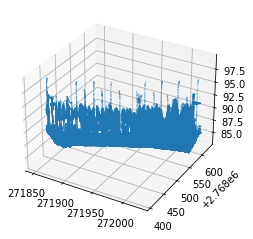

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(decimated_points_random[:,0], decimated_points_random[:,1], decimated_points_random[:,2], s=0.01)
plt.show()